In [1]:
# @itsvenu_
# PCA

# detect correlation b/w features and reduce them


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
dat = pd.read_csv('../../data/Wine.csv')
dat.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
X = dat.iloc[:, :-1].values
Y = dat.iloc[:, -1].values

In [6]:
# split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# feature scaling
sc = StandardScaler()

In [9]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# PCA
# print(X_train.shape)

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [14]:
X_train.shape

(142, 2)

In [16]:
# do LogisticRegression with 2 PCA identified above

lrClassifier = LogisticRegression(random_state=42)

In [17]:
lrClassifier.fit(X_train, Y_train)

/Users/venu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/venu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
Y_pred = lrClassifier.predict(X_test)

In [20]:
accuracy_score(Y_test, Y_pred)

1.0

In [21]:
Y_test

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1])

In [22]:
Y_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1])

In [24]:
# 100% accuracy?
# Too good to be true!
confusion_matrix(Y_test, Y_pred)

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

Text(0, 0.5, 'PC2')

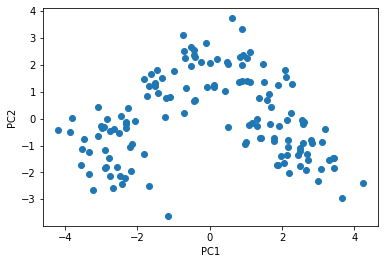

In [26]:
# visualize PC1 and PC2
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')